In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import os


In [63]:
# Define base paths
data_dir = "../../data/loaded"
Images_dir = "../../images/processing_1"
processed_data_dir = "../../data/processed"
soil_file_path = os.path.join(data_dir, "soil.csv")

In [3]:
soil_df = pd.read_csv(soil_file_path)

# handeling missing values

In [41]:
soil_df.isnull().sum()

longitude              0
latitude               0
HWSD2_SMU_ID           0
LAYER            2239134
COARSE           2239134
SAND             2239134
SILT             2239134
CLAY             2239134
TEXTURE_USDA     3578666
TEXTURE_SOTER    2239134
BULK             2239134
REF_BULK         3578666
ORG_CARBON       2239134
PH_WATER         2239134
TOTAL_N          2239134
CN_RATIO         2239134
CEC_SOIL         2239134
CEC_CLAY         2239134
CEC_EFF          2239134
TEB              2239134
BSAT             2239134
ALUM_SAT         2239134
ESP              2239134
TCARBON_EQ       2239134
GYPSUM           2239134
ELEC_COND        2239134
dtype: int64

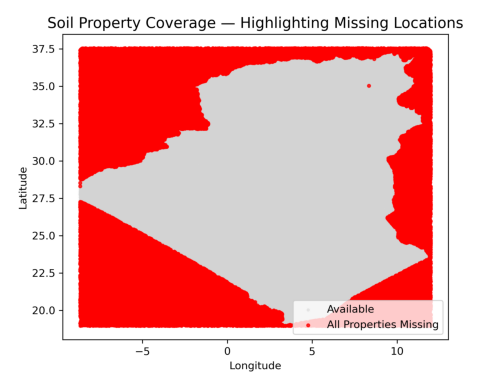

In [5]:
# read and show image of pixels where all soil features are missing
import matplotlib.image as mpimg
img = mpimg.imread(r"C:\Users\T14s\Desktop\M2\Data mining\images\EDA_1\soil_all_missing_overlay.png")
plt.imshow(img)
plt.axis('off')
plt.show()

In [4]:
# remove warnings
import warnings
warnings.filterwarnings("ignore")

In [5]:
props = ['COARSE', 'SAND', 'SILT', 'CLAY', 'TEXTURE_USDA', 'TEXTURE_SOTER', 
         'BULK', 'REF_BULK', 'ORG_CARBON', 'PH_WATER', 'TOTAL_N', 'CN_RATIO', 
         'CEC_SOIL', 'CEC_CLAY', 'CEC_EFF', 'TEB', 'BSAT', 'ALUM_SAT', 
         'ESP', 'TCARBON_EQ', 'GYPSUM', 'ELEC_COND']

### 1- drop all missing rows

In [53]:
# drop rows that have all props are missing
mask_all_missing = soil_df[props].isnull().all(axis=1)
soil_df_cleaned = soil_df[~mask_all_missing].reset_index(drop=True)
print(f"Cleaned soil_df shape (all missing rows removed): {soil_df_cleaned.shape}")
print(f"Dropped {mask_all_missing.sum()} rows with all properties missing.")

Cleaned soil_df shape (all missing rows removed): (7113536, 26)
Dropped 2239134 rows with all properties missing.


In [54]:
soil_df_cleaned.isnull().sum()

longitude              0
latitude               0
HWSD2_SMU_ID           0
LAYER                  0
COARSE                 0
SAND                   0
SILT                   0
CLAY                   0
TEXTURE_USDA     1339532
TEXTURE_SOTER          0
BULK                   0
REF_BULK         1339532
ORG_CARBON             0
PH_WATER               0
TOTAL_N                0
CN_RATIO               0
CEC_SOIL               0
CEC_CLAY               0
CEC_EFF                0
TEB                    0
BSAT                   0
ALUM_SAT               0
ESP                    0
TCARBON_EQ             0
GYPSUM                 0
ELEC_COND              0
dtype: int64

### 2- Drop rows of negative values

In [55]:
props_num = ['COARSE', 'SAND', 'SILT', 'CLAY',
         'BULK', 'REF_BULK', 'ORG_CARBON', 'PH_WATER', 'TOTAL_N', 'CN_RATIO', 
         'CEC_SOIL', 'CEC_CLAY', 'CEC_EFF', 'TEB', 'BSAT', 'ALUM_SAT', 
         'ESP', 'TCARBON_EQ', 'GYPSUM', 'ELEC_COND']

In [56]:
# check for negative values in numerical properties
negative_value_cols = {}
for col in props_num:
    if soil_df_cleaned[col].dtype in [np.float64, np.int64]:
        negative_values = soil_df_cleaned[soil_df_cleaned[col] < 0]
        if not negative_values.empty:
            negative_value_cols[col] = negative_values.shape[0]
            print(f"Column {col} has {negative_values.shape[0]} negative values.")

Column COARSE has 1339532 negative values.
Column SAND has 1339532 negative values.
Column SILT has 1339532 negative values.
Column CLAY has 1339532 negative values.
Column BULK has 1339532 negative values.
Column ORG_CARBON has 1339532 negative values.
Column PH_WATER has 1339532 negative values.
Column TOTAL_N has 1339532 negative values.
Column CN_RATIO has 1339532 negative values.
Column CEC_SOIL has 1339532 negative values.
Column CEC_CLAY has 1339532 negative values.
Column CEC_EFF has 1339532 negative values.
Column TEB has 1339532 negative values.
Column BSAT has 1339532 negative values.
Column ALUM_SAT has 1339532 negative values.
Column ESP has 1339532 negative values.
Column TCARBON_EQ has 1339532 negative values.
Column GYPSUM has 1339532 negative values.
Column ELEC_COND has 1339532 negative values.


In [57]:
# check if negative rows and missing all intersect in same rows
negative_rows_mask = (soil_df_cleaned[props_num] < 0).any(axis=1)
mask_tex_ref_missing = soil_df_cleaned[['TEXTURE_USDA', 'REF_BULK']].isnull().all(axis=1)
# check if negative rows are also rows where the 2 cols are missing
negative_and_tex_ref_missing = negative_rows_mask & mask_tex_ref_missing
print(f"Number of rows with negative values and missing TEXTURE_USDA & REF_BULK: {negative_and_tex_ref_missing.sum()}")


Number of rows with negative values and missing TEXTURE_USDA & REF_BULK: 1339532


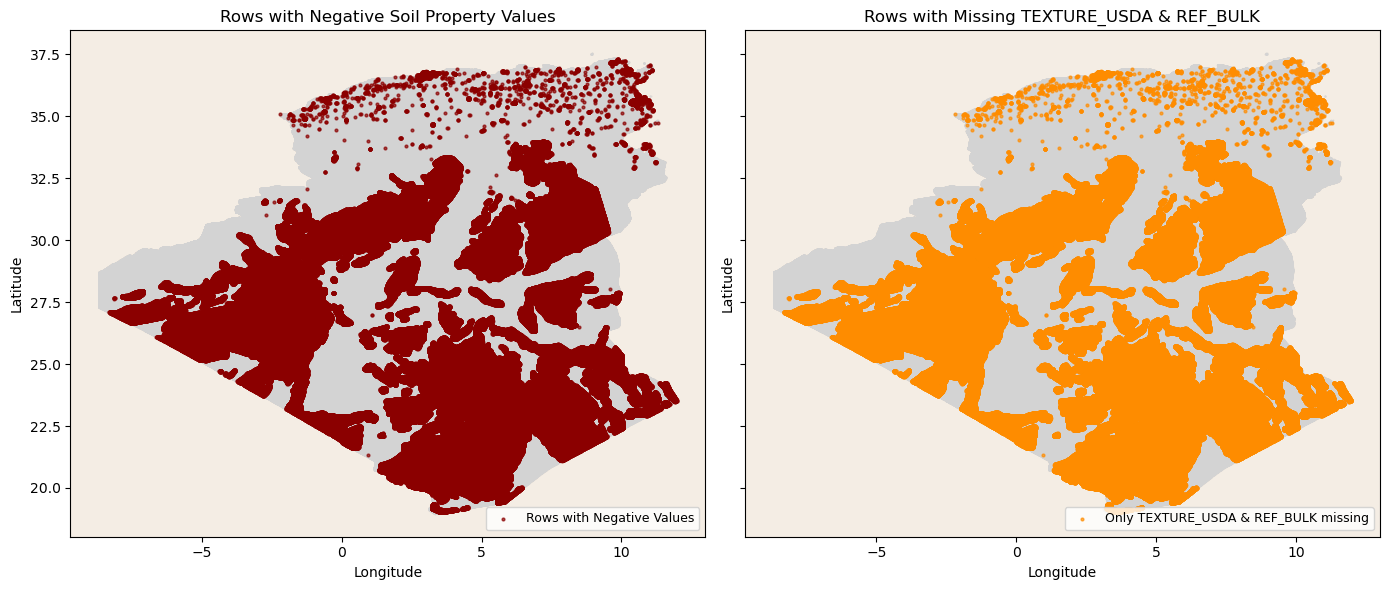

In [22]:
# plot negative value rows and missing texture & ref_bulk rows in 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharex=True, sharey=True)
earth_cmap = plt.cm.get_cmap('terrain_r')  # earthy color palette
# Background (all data points)
axes[0].scatter(soil_df_cleaned['longitude'], soil_df_cleaned['latitude'], s=0.1, c='lightgray', alpha=0.4)
axes[1].scatter(soil_df_cleaned['longitude'], soil_df_cleaned['latitude'], s=0.1, c='lightgray', alpha=0.4)
# Plot negative value zones
axes[0].scatter(soil_df_cleaned.loc[negative_rows_mask, 'longitude'], 
                soil_df_cleaned.loc[negative_rows_mask, 'latitude'], 
                s=4, c='darkred', alpha=0.7, label="Rows with Negative Values")
# Plot missing texture & ref_bulk zones
axes[1].scatter(soil_df_cleaned.loc[mask_tex_ref_missing, 'longitude'], 
                soil_df_cleaned.loc[mask_tex_ref_missing, 'latitude'], 
                s=4, c='darkorange', alpha=0.7, label="Only TEXTURE_USDA & REF_BULK missing")
# Titles and legends
axes[0].set_title("Rows with Negative Soil Property Values", fontsize=12)
axes[1].set_title("Rows with Missing TEXTURE_USDA & REF_BULK", fontsize=12)
for ax in axes:
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")
    ax.legend(loc="lower right", fontsize=9)
    ax.set_facecolor("#f4ede4")  # soft earth tone background
plt.tight_layout()
plt.savefig(os.path.join(Images_dir, "soil_negative_and_missing_patterns.png"))
plt.show()

In [58]:
# texture_soter values where negative values and missing texture & ref_bulk intersect
intersecting_textures = soil_df_cleaned.loc[negative_and_tex_ref_missing, 'TEXTURE_SOTER'].unique()
print("Unique TEXTURE_SOTER values where negative values & missing TEXTURE_USDA & REF_BULK intersect:")
print(intersecting_textures)

Unique TEXTURE_SOTER values where negative values & missing TEXTURE_USDA & REF_BULK intersect:
['-']


In [59]:
# drop rows of negative_and_tex_ref_missing
soil_df_cleaned = soil_df_cleaned[~negative_and_tex_ref_missing].reset_index(drop=True)
print(f"Cleaned soil_df shape (negative value & missing TEXTURE_USDA & REF_BULK rows removed): {soil_df_cleaned.shape}")
print(f"Dropped {negative_and_tex_ref_missing.sum()} rows with negative values & missing TEXTURE_USDA & REF_BULK.")
soil_df_cleaned.isnull().sum()

Cleaned soil_df shape (negative value & missing TEXTURE_USDA & REF_BULK rows removed): (5774004, 26)
Dropped 1339532 rows with negative values & missing TEXTURE_USDA & REF_BULK.


longitude        0
latitude         0
HWSD2_SMU_ID     0
LAYER            0
COARSE           0
SAND             0
SILT             0
CLAY             0
TEXTURE_USDA     0
TEXTURE_SOTER    0
BULK             0
REF_BULK         0
ORG_CARBON       0
PH_WATER         0
TOTAL_N          0
CN_RATIO         0
CEC_SOIL         0
CEC_CLAY         0
CEC_EFF          0
TEB              0
BSAT             0
ALUM_SAT         0
ESP              0
TCARBON_EQ       0
GYPSUM           0
ELEC_COND        0
dtype: int64

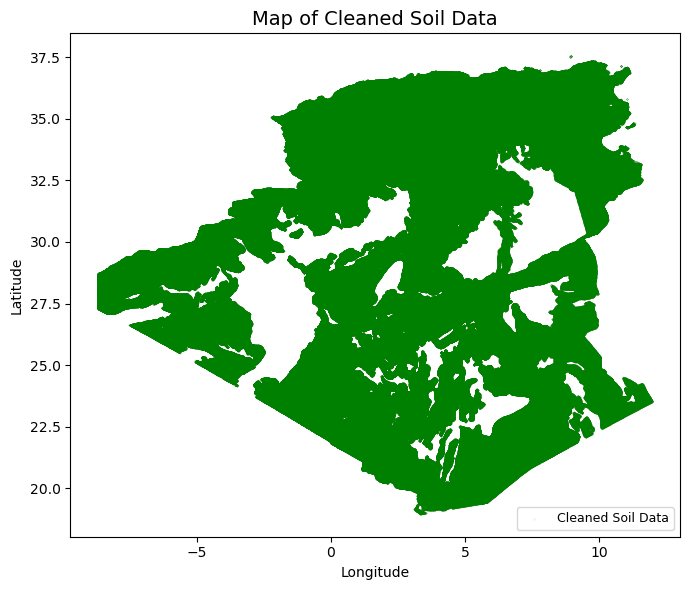

In [26]:
# plot map of cleaned soil data
fig, ax = plt.subplots(figsize=(7, 6))
# Background (all data points)
ax.scatter(soil_df_cleaned['longitude'], soil_df_cleaned['latitude'], s=0.01, c='lightgray', alpha=0.4)
# Plot cleaned data points
ax.scatter(soil_df_cleaned['longitude'], soil_df_cleaned['latitude'], s=0.01, c='green', alpha=0.6, label="Cleaned Soil Data")
ax.set_title("Map of Cleaned Soil Data", fontsize=14)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.legend(loc="lower right", fontsize=9)
plt.tight_layout()
plt.savefig(os.path.join(Images_dir, "soil_cleaned_data_map.png"))
plt.show()

In [60]:
# print unique values of TEXTURE_SOTER
unique_textures_soter = soil_df_cleaned['TEXTURE_SOTER'].unique()
print("Unique TEXTURE_SOTER values after cleaning:")
print(unique_textures_soter)
# print value counts
print("Value counts of TEXTURE_SOTER after cleaning:")
print(soil_df_cleaned['TEXTURE_SOTER'].value_counts())
# compare value count sum to nb rows
print(f"Total rows in cleaned soil_df: {soil_df_cleaned.shape[0]}")
print(f"Sum of TEXTURE_SOTER value counts: {soil_df_cleaned['TEXTURE_SOTER'].value_counts().sum()}")

Unique TEXTURE_SOTER values after cleaning:
['M' 'C' 'F']
Value counts of TEXTURE_SOTER after cleaning:
TEXTURE_SOTER
M    3678676
C    2000403
F      94925
Name: count, dtype: int64
Total rows in cleaned soil_df: 5774004
Sum of TEXTURE_SOTER value counts: 5774004


In [61]:
soil_df_cleaned.isnull().sum()


longitude        0
latitude         0
HWSD2_SMU_ID     0
LAYER            0
COARSE           0
SAND             0
SILT             0
CLAY             0
TEXTURE_USDA     0
TEXTURE_SOTER    0
BULK             0
REF_BULK         0
ORG_CARBON       0
PH_WATER         0
TOTAL_N          0
CN_RATIO         0
CEC_SOIL         0
CEC_CLAY         0
CEC_EFF          0
TEB              0
BSAT             0
ALUM_SAT         0
ESP              0
TCARBON_EQ       0
GYPSUM           0
ELEC_COND        0
dtype: int64

### save to csv

In [65]:
# drop  'HWSD2_SMU_ID', 'LAYER' columns
soil_df_cleaned = soil_df_cleaned.drop(columns=['HWSD2_SMU_ID', 'LAYER'])


In [66]:
soil_df_cleaned.to_csv(os.path.join(processed_data_dir, "soil.csv"), index=False)